In [12]:
#Libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
#Read the train and test files
train_df = pd.read_csv("C:/Users/ADMIN/Documents/MyGitProjects/AnalyticsVidyaHackathon/JanataHackathon/train_8wry4cB.csv")
test_df = pd.read_csv("C:/Users/ADMIN/Documents/MyGitProjects/AnalyticsVidyaHackathon/JanataHackathon/test_Yix80N0.csv")

In [14]:
#descriptive statistical view
print(train_df.shape, test_df.shape)

(10500, 5) (4500, 4)


Proportion: 3.55 : 1


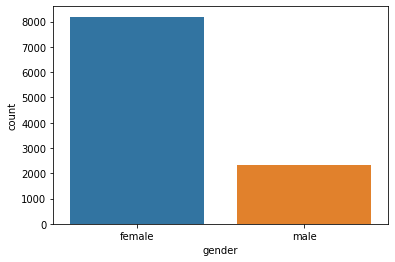

In [15]:
target_count = (train_df['gender']).value_counts()
sns.countplot(train_df['gender'])
pd.Series(train_df['gender']).value_counts()
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

In [16]:
train_df.head()

,session_id,startTime,endTime,ProductList,gender
0,u16159,15/12/14 18:11,15/12/14 18:12,A00002/B00003/C00006/D28435/;A00002/B00003/C00...,female
1,u10253,16/12/14 14:35,16/12/14 14:41,A00001/B00009/C00031/D29404/;A00001/B00009/C00...,male
2,u19037,01/12/14 15:58,01/12/14 15:58,A00002/B00001/C00020/D16944/,female
3,u14556,23/11/14 2:57,23/11/14 3:00,A00002/B00004/C00018/D10284/;A00002/B00004/C00...,female
4,u24295,17/12/14 16:44,17/12/14 16:46,A00001/B00001/C00012/D30805/;A00001/B00001/C00...,male


In [17]:
test_df.head()

,session_id,startTime,endTime,ProductList
0,u12112,08/12/14 13:36,08/12/14 13:36,A00002/B00003/C00006/D19956/
1,u19725,19/12/14 13:52,19/12/14 13:52,A00002/B00005/C00067/D02026/
2,u11795,01/12/14 10:44,01/12/14 10:44,A00002/B00002/C00004/D12538/
3,u22639,08/12/14 20:19,08/12/14 20:22,A00002/B00003/C00079/D22781/;A00002/B00003/C00...
4,u18034,15/12/14 19:33,15/12/14 19:33,A00002/B00001/C00010/D23419/


In [18]:
train_df.ProductList.describe()

count                            10500
unique                            9402
top       A00002/B00002/C00007/D00266/
freq                                25
Name: ProductList, dtype: object

In [19]:
test_df.ProductList.describe()

count                             4500
unique                            4207
top       A00002/B00002/C00007/D00266/
freq                                14
Name: ProductList, dtype: object

In [20]:
train_df.isna().sum()

session_id     0
startTime      0
endTime        0
ProductList    0
gender         0
dtype: int64

In [21]:
test_df.isna().sum()

session_id     0
startTime      0
endTime        0
ProductList    0
dtype: int64

In [22]:
#Explorative Analysis - ProductList dissection 
def ProdList(prodlist,sessid):
    cat = []
    subcat = []
    ssubcat= []
    prod =[]    
    #prod_df = pd.DataFrame(columns=['session_id','cat'])#, 'subcat', 'ssubcat','prod'])
    for i in prodlist.split(';'):
        cat.append(i.split('/')[0])
        #totcatviewed = max(set(cat), key = cat.count)
        subcat.append(i.split('/')[1])
        ssubcat.append(i.split('/')[2])
        prod.append(i.split('/')[3])   
        
        #prod_df = prod_df.append({'cat':totcatviewed},ignore_index=True)#,'subcat':subcat,'ssubcat': ssubcat,'prod':prod},ignore_index=True)
    return totNoOfItemsviewed(cat,subcat,ssubcat,prod,sessid)

def totNoOfItemsviewed(cat,subcat,ssubcat,prod,sessid):
    #totitems_df = pd.Series(columns = ['session_id','totcat','totsubcat','totssubcat','totprod'])  
    totitems_df = pd.Series({'session_id':sessid,'totcat': len(set(cat)), 'totsubcat' : len(set(subcat)), 'totssubcat' : len(set(ssubcat)),'totprod' : len(set(prod))})
    #totitems_df = totitems_df.append(sessid, len(set(cat)),  len(set(subcat)), len(set(subcat)))
    return totitems_df

In [23]:
prodlist = train_df[['ProductList','session_id']].copy()
prod_df = prodlist.apply(lambda x : ProdList(x.ProductList,x.session_id),axis=1)
df_product = pd.DataFrame({'session_id':prod_df.session_id, 'totcat': prod_df.totcat, 'totsubcat' : prod_df.totsubcat, 'totssubcat' : prod_df.totssubcat,'totprod' : prod_df.totprod})

df_product['Category'] = train_df['ProductList'].apply(lambda x : x.split(';')[0].split('/')[0])
df_product['SubCategory'] = train_df['ProductList'].apply(lambda x : x.split(';')[0].split('/')[1])
df_product['SSubCategory'] = train_df['ProductList'].apply(lambda x : x.split(';')[0].split('/')[2])
df_product['Prod'] = train_df['ProductList'].apply(lambda x : x.split(';')[0].split('/')[3])

df_product.head()


#x = 'A00003/B00012/C00028/D13870/;A00003/B00035/C00106/D14240/;A00003/B00028/C00179/D14246/;A00003/B00028/C00179/D14254/;A00003/B00028/C00179/D14255/;A00003/B00028/C00179/D14257/;A00003/B00028/C00179/D14258/;A00003/B00028/C00179/D13913/;A00003/B00028/C00179/D13914/;A00003/B00028/C00179/D14261/;A00003/B00028/C00179/D14262/;A00003/B00028/C00179/D13920/;A00003/B00028/C00179/D13927/;A00003/B00028/C00179/D13364/'
#prod_df = ProdList(x)

,session_id,totcat,totsubcat,totssubcat,totprod,Category,SubCategory,SSubCategory,Prod
0,u16159,1,1,1,4,A00002,B00003,C00006,D28435
1,u10253,1,1,1,7,A00001,B00009,C00031,D29404
2,u19037,1,1,1,1,A00002,B00001,C00020,D16944
3,u14556,1,1,1,3,A00002,B00004,C00018,D10284
4,u24295,1,1,1,2,A00001,B00001,C00012,D30805


In [24]:
#Encoding of categorical variables
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder

cols = ['Category','SubCategory','SSubCategory','Prod']
labelencoder = preprocessing.LabelEncoder()
df_product[cols] = df_product[cols].apply(labelencoder.fit_transform)

new_train_df = pd.merge(train_df,df_product,on='session_id')  
new_train_df['gender'].fillna( method ='ffill', inplace = True) 
new_train_df['gender'] = new_train_df['gender'].map( {'female': 1, 'male': 0})  
target = new_train_df['gender']

new_train_df = new_train_df.drop(columns=['ProductList','gender','session_id'],axis=1)
new_train_df.head()

,startTime,endTime,totcat,totsubcat,totssubcat,totprod,Category,SubCategory,SSubCategory,Prod
0,15/12/14 18:11,15/12/14 18:12,1,1,1,4,1,2,5,6833
1,16/12/14 14:35,16/12/14 14:41,1,1,1,7,0,8,30,7015
2,01/12/14 15:58,01/12/14 15:58,1,1,1,1,1,0,19,4359
3,23/11/14 2:57,23/11/14 3:00,1,1,1,3,1,3,17,2802
4,17/12/14 16:44,17/12/14 16:46,1,1,1,2,0,0,11,7273


In [25]:
prodlist = test_df[['ProductList','session_id']].copy()
prod_df = prodlist.apply(lambda x : ProdList(x.ProductList,x.session_id),axis=1)
df_product = pd.DataFrame({'session_id':prod_df.session_id, 'totcat': prod_df.totcat, 'totsubcat' : prod_df.totsubcat, 'totssubcat' : prod_df.totssubcat,'totprod' : prod_df.totprod})

df_product['Category'] = test_df['ProductList'].apply(lambda x : x.split(';')[0].split('/')[0])
df_product['SubCategory'] = test_df['ProductList'].apply(lambda x : x.split(';')[0].split('/')[1])
df_product['SSubCategory'] = test_df['ProductList'].apply(lambda x : x.split(';')[0].split('/')[2])
df_product['Prod'] = test_df['ProductList'].apply(lambda x : x.split(';')[0].split('/')[3])

df_product.head()




#testprodlist = test_df[['ProductList','session_id']].copy()
#prod_df_test = testprodlist.apply(lambda x : ProdList(x.ProductList,x.session_id),axis=1)
#prod_df_test.head()

,session_id,totcat,totsubcat,totssubcat,totprod,Category,SubCategory,SSubCategory,Prod
0,u12112,1,1,1,1,A00002,B00003,C00006,D19956
1,u19725,1,1,1,1,A00002,B00005,C00067,D02026
2,u11795,1,1,1,1,A00002,B00002,C00004,D12538
3,u22639,1,1,1,4,A00002,B00003,C00079,D22781
4,u18034,1,1,1,1,A00002,B00001,C00010,D23419


In [26]:
#Encoding of categorical variables
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder

cols = ['Category','SubCategory','SSubCategory','Prod']
labelencoder = preprocessing.LabelEncoder()
df_product[cols] = df_product[cols].apply(labelencoder.fit_transform)

new_test_df = pd.merge(test_df,df_product,on='session_id')  
new_test_df = new_test_df.drop(columns=['ProductList','session_id'],axis=1)
new_test_df.head()

,startTime,endTime,totcat,totsubcat,totssubcat,totprod,Category,SubCategory,SSubCategory,Prod
0,08/12/14 13:36,08/12/14 13:36,1,1,1,1,1,2,5,2502
1,19/12/14 13:52,19/12/14 13:52,1,1,1,1,1,4,62,308
2,01/12/14 10:44,01/12/14 10:44,1,1,1,1,1,1,3,1630
3,08/12/14 20:19,08/12/14 20:22,1,1,1,4,1,2,73,2764
4,15/12/14 19:33,15/12/14 19:33,1,1,1,1,1,0,9,2812


In [27]:
def preprocessdata(df):
    # Extracting date features
    df['startTime'] = pd.to_datetime(df.startTime)
    df['endTime'] = pd.to_datetime(df.endTime)
    df['timespent']=(df.endTime-df.startTime).astype('timedelta64[s]')    
    
    df['start_hr'] = df['startTime'].dt.hour
    df['start_min']= df['startTime'].dt.minute
    df['end_hr']=  df['endTime'].dt.hour
    df['end_min']= df['endTime'].dt.minute  
    
    df = df.drop(['startTime','endTime'],axis=1)
    return df

In [28]:
new_train_df = preprocessdata(new_train_df)
new_train_df.head()

,totcat,totsubcat,totssubcat,totprod,Category,SubCategory,SSubCategory,Prod,timespent,start_hr,start_min,end_hr,end_min
0,1,1,1,4,1,2,5,6833,60.0,18,11,18,12
1,1,1,1,7,0,8,30,7015,360.0,14,35,14,41
2,1,1,1,1,1,0,19,4359,0.0,15,58,15,58
3,1,1,1,3,1,3,17,2802,180.0,2,57,3,0
4,1,1,1,2,0,0,11,7273,120.0,16,44,16,46


In [29]:
new_test_df = preprocessdata(new_test_df)
new_test_df.head()

,totcat,totsubcat,totssubcat,totprod,Category,SubCategory,SSubCategory,Prod,timespent,start_hr,start_min,end_hr,end_min
0,1,1,1,1,1,2,5,2502,0.0,13,36,13,36
1,1,1,1,1,1,4,62,308,0.0,13,52,13,52
2,1,1,1,1,1,1,3,1630,0.0,10,44,10,44
3,1,1,1,4,1,2,73,2764,180.0,20,19,20,22
4,1,1,1,1,1,0,9,2812,0.0,19,33,19,33


In [3]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(new_train_df, target, train_size=0.80,random_state=1200)

print(train_X.shape, test_X.shape)

NameError: name 'new_train_df' is not defined

In [ ]:
#Model building 
from sklearn.model_selection import  GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold, KFold

from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support, roc_auc_score)

gkf = KFold(n_splits=5, shuffle=True, random_state=42).split(X=train_X, y=train_y)
fit_params_of_xgb = {
    "early_stopping_rounds":100, 
    "eval_metric" : 'auc', 
    "eval_set" : [(test_X,test_y)],
    # 'callbacks': [lgb.reset_parameter(learning_rate=learning_rate_010_decay_power_099)],
    'verbose': 500,
}
params = {
    'booster': ["gbtree"],
    'learning_rate': [0.03],
    'n_estimators': [2000],#range(1000, 2000, 3000),#range(100, 500, 100)
    'min_child_weight': [1],#1
    'gamma': [0],
    'subsample': [0.4],
    'colsample_bytree': [0.8],
    'max_depth': [4],
    "scale_pos_weight": [1],
    "reg_alpha":[1],#0.08
}
xgb_estimator = XGBClassifier(
    objective='binary:logistic',
    silent=True,
)

gsearch = GridSearchCV(
    estimator=xgb_estimator,
    param_grid=params,
    scoring='roc_auc',
    n_jobs=-1,
    cv=gkf, verbose=3
)
xgb_model = gsearch.fit(X=train_X, y=train_y, **fit_params_of_xgb)
gsearch.best_params_, gsearch.best_score_

In [2]:
fit_params_of_xgb = {
    "early_stopping_rounds":100, 
    "eval_metric" : 'auc', 
    "eval_set" : [(test_X,test_y)],
    # 'callbacks': [lgb.reset_parameter(learning_rate=learning_rate_010_decay_power_099)],
    'verbose': 500
}
xgb_estimator = XGBClassifier(
    objective='binary:logistic',
    silent=True,    
    booster= "gbtree",
    learning_rate= 0.02,
    n_estimators=2000,#range(1000, 2000, 3000),#range(100, 500, 100)
    min_child_weight= 1,#1
    gamma= 0,
    subsample= 0.4,
    colsample_bytree= 0.8,
    max_depth= 4,
    scale_pos_weight=1,
    reg_alpha=1,#0.08
)
xgb_model = xgb_estimator.fit(X=train_X, y=train_y, **fit_params_of_xgb)
from sklearn.metrics import accuracy_score
xgb_model.best_score, xgb_model.get_params
xgb_model.score(train_X,train_y)

NameError: name 'test_X' is not defined

In [44]:
x_Pred = xgb_model.predict(test_X)
xgb_model.score(test_X,test_y)

0.8866666666666667

In [ ]:
matrix = confusion_matrix(test_y, x_Pred)
print("--------------------------------------------------------------------------------------------")
print('Confusion matrix\n\n', matrix)
print('\nTrue Positives(TP) Females  = ', matrix[0,0])
print('\nTrue Negatives(TN)  Males = ', matrix[1,1])
print('\nFalse Positives(FP) = ', matrix[0,1])
print('\nFalse Negatives(FN) = ', matrix[1,0])

In [33]:
def fgender(glist):
    if (glist == 1):
        glist = "female"
    else:
        glist="male"
    return glist

Proportion: 5.63 : 1


female    3821
male       679
dtype: int64

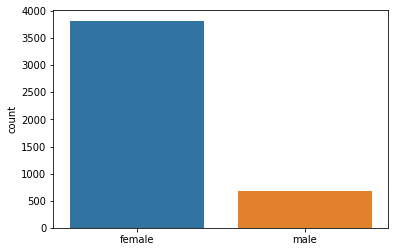

In [46]:
#Prediction and submission

Y_pred = xgb_estimator.predict(new_test_df)

genderlst = list(map(fgender,Y_pred))
output = pd.DataFrame({'session_id': test_df.session_id,'gender': genderlst})
output.to_csv('predictions.csv', index=False)
sns.countplot(genderlst)
target_count = pd.Series(genderlst).value_counts()
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')
pd.Series(genderlst).value_counts()